<a href="https://colab.research.google.com/github/KIRTIRAJ4327/30days-AI-challenge/blob/main/Day15_language_translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Concept**

The focus is on machine translation, specifically creating a specialized translator for a specific domain (like tech terms or cooking).

**Let's build a cooking-focused translator between English and another language (Hindi i'm trying ).**

system-architecture.svg

**Let's set Up our Environment**

In [13]:
# Install required libraries
!pip install transformers
!pip install sentencepiece
!pip install sacremoses  # Often needed for MarianMT models

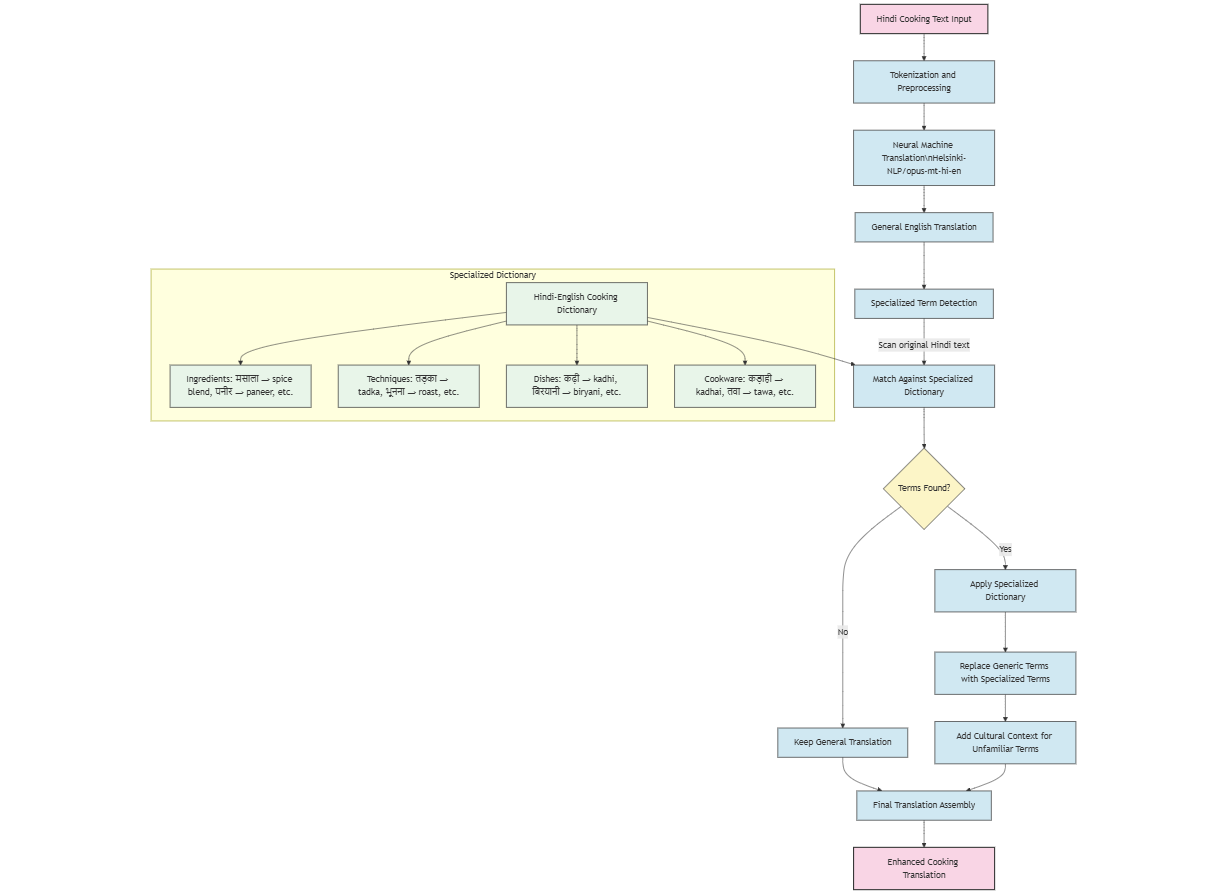

**Import Required Libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import MarianMTModel, MarianTokenizer
import time
import re

**Load Hindi-English Translation Model**

In [15]:
# Load Hindi-English model
model_name = "Helsinki-NLP/opus-mt-hi-en"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)
print(f"Successfully loaded Hindi-English model: {model_name}")

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/813k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/304M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/304M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Successfully loaded Hindi-English model: Helsinki-NLP/opus-mt-hi-en


**Create Basic Translation Function**

In [16]:
def translate_text(text, model, tokenizer):
    """Translate text using the loaded model."""
    # Prepare the text for the model
    inputs = tokenizer(text, return_tensors="pt", padding=True)

    # Generate translation
    translated = model.generate(**inputs)

    # Decode the generated tokens
    result = tokenizer.decode(translated[0], skip_special_tokens=True)

    return result

**Create a Small Gujarati Cooking Dataset**

In [17]:
# Create a dataset of Hindi cooking terms and sentences
hindi_cooking_texts = [
    "गरम मसाला बनाने के लिए सभी मसालों को मिलाएं।",  # Mix all spices to make garam masala.
    "आलू को छीलकर छोटे टुकड़ों में काट लें।",  # Peel the potatoes and cut them into small pieces.
    "प्याज़ को बारीक काटकर तेल में भूनें।",  # Finely chop the onions and fry them in oil.
    "दाल को प्रेशर कुकर में उबालें।",  # Boil the lentils in a pressure cooker.
    "मसाले को कड़ाही में भुनें।",  # Roast the spices in a kadhai.
    "पनीर को मलाई में भिगोकर रखें।",  # Soak the paneer in cream.
    "रोटी को तवे पर सेंकें।",  # Bake the roti on a tawa.
    "इडली के लिए चावल और उड़द दाल का घोल तैयार करें।",  # Prepare rice and urad dal batter for idli.
    "छोले मसाला बनाने के लिए टमाटर और प्याज का पेस्ट बनाएं।",  # Make tomato and onion paste for chole masala.
    "समोसे के लिए आलू की सब्जी बनाएं।",  # Make potato curry for samosa.
]

# Create a dataframe to store original and translations
df_cooking = pd.DataFrame({
    'hindi_text': hindi_cooking_texts,
    'general_translation': None,
    'specialized_translation': None
})

print("Dataset created with", len(hindi_cooking_texts), "Hindi cooking-related sentences")

Dataset created with 10 Hindi cooking-related sentences


**Create a Specialized Hindi  Cooking Dictionary**

In [18]:
# Create a specialized cooking dictionary (Hindi -> English)
cooking_dictionary = {
    "मसाला": "spice blend",
    "गरम मसाला": "garam masala (warm spice blend)",
    "छीलकर": "peeled",
    "काटना": "to cut",
    "बारीक": "finely",
    "भूनना": "to fry",
    "प्याज़": "onion",
    "आलू": "potato",
    "दाल": "lentils",
    "प्रेशर कुकर": "pressure cooker",
    "उबालना": "to boil",
    "कड़ाही": "kadhai (wok)",
    "भुनना": "to roast",
    "पनीर": "paneer (Indian cottage cheese)",
    "मलाई": "cream",
    "भिगोना": "to soak",
    "रोटी": "roti (flatbread)",
    "तवा": "tawa (griddle)",
    "सेंकना": "to bake",
    "इडली": "idli (steamed rice cake)",
    "चावल": "rice",
    "उड़द दाल": "urad dal (black gram lentil)",
    "घोल": "batter",
    "छोले": "chole (chickpea curry)",
    "टमाटर": "tomato",
    "पेस्ट": "paste",
    "समोसा": "samosa (fried pastry)",
    "सब्जी": "curry",
    "तड़का": "tadka (tempering)"
}

print(f"Created specialized dictionary with {len(cooking_dictionary)} Hindi cooking terms")

Created specialized dictionary with 29 Hindi cooking terms


**Implement Specialized Translation Function**

In [19]:
def specialized_translate(text, general_translation, domain_dict):
    """Perform domain-specific translation with specialized cooking terms."""
    specialized_result = general_translation

    # Check each term in our specialized dictionary
    for hindi_term, english_term in domain_dict.items():
        if hindi_term in text:
            # Simple approach: If the specialized term isn't already in the translation,
            # look for words that might be its general translation and replace them

            # First, extract the basic form (without parentheses)
            basic_term = english_term.split(" (")[0] if " (" in english_term else english_term

            # Check if our specialized term is already in the translation
            if basic_term.lower() in specialized_result.lower():
                # If it's there but without the cultural context, add it
                if "(" in english_term and "(" not in specialized_result:
                    # Find the basic term in the result
                    pattern = re.compile(re.escape(basic_term), re.IGNORECASE)
                    match = pattern.search(specialized_result)
                    if match:
                        start, end = match.span()
                        # Replace with the full specialized term
                        specialized_result = specialized_result[:start] + english_term + specialized_result[end:]
            else:
                # Try to identify what the general translator used for this term
                # This is a simplified approach - word alignment would be better

                # Split the term into words
                hindi_words = hindi_term.split()

                # If it's a multi-word term, use a different strategy
                if len(hindi_words) > 1:
                    # Try to find a reasonable place to add the specialized term
                    # For demonstration, we'll add it at the end with clarification
                    if "(" not in english_term:
                        specialized_result += f" ('{english_term}' in Hindi: {hindi_term})"
                    else:
                        specialized_result += f" ({english_term})"
                else:
                    # For single words, try to replace similar words
                    english_words = general_translation.split()
                    # Find the most likely translation by comparing word lengths
                    for i, word in enumerate(english_words):
                        # Simple heuristic - if the word is approximately the same length
                        if 0.5 <= len(word) / max(1, len(basic_term.split()[0])) <= 2.0 and len(word) > 3:
                            # Replace with our specialized term
                            english_words[i] = english_term
                            specialized_result = " ".join(english_words)
                            break

    return specialized_result

**Translate and Compare Results**

In [20]:
# Translate using both methods
for i, row in df_cooking.iterrows():
    # General translation
    general_trans = translate_text(row['hindi_text'], model, tokenizer)
    df_cooking.at[i, 'general_translation'] = general_trans

    # Specialized translation
    specialized_trans = specialized_translate(row['hindi_text'], general_trans, cooking_dictionary)
    df_cooking.at[i, 'specialized_translation'] = specialized_trans

    # Print results
    print(f"\nOriginal (Hindi): {row['hindi_text']}")
    print(f"General Translation: {general_trans}")
    print(f"Specialized Translation: {specialized_trans}")
    print("-" * 80)

    # Add a small delay to avoid overloading the model
    time.sleep(1)


Original (Hindi): गरम मसाला बनाने के लिए सभी मसालों को मिलाएं।
General Translation: In order to form a hoter mix.
Specialized Translation: In spice blend to form a hoter mix. (garam masala (warm spice blend))
--------------------------------------------------------------------------------

Original (Hindi): आलू को छीलकर छोटे टुकड़ों में काट लें।
General Translation: Cut the cankers into small pieces.
Specialized Translation: Cut the potato into small pieces.
--------------------------------------------------------------------------------

Original (Hindi): प्याज़ को बारीक काटकर तेल में भूनें।
General Translation: You shall cut the garlic, and put it on fine oil.
Specialized Translation: You onion cut the garlic, and put it on fine oil.
--------------------------------------------------------------------------------

Original (Hindi): दाल को प्रेशर कुकर में उबालें।
General Translation: Snack the pan under pressure.
Specialized Translation: lentils the pan under pressure. ('pressure coo

**Evaluate the Differences**

In [21]:
# Count differences between general and specialized translations
count_differences = sum(df_cooking['general_translation'] != df_cooking['specialized_translation'])
print(f"Found differences in {count_differences} out of {len(df_cooking)} translations")

# Calculate percentage of terms that were specialized
terms_found = 0
terms_used = 0

for i, row in df_cooking.iterrows():
    for term in cooking_dictionary.keys():
        if term in row['hindi_text']:
            terms_found += 1
            # Check if specialized translation is different
            if row['general_translation'] != row['specialized_translation']:
                terms_used += 1
                break

print(f"Found cooking terms in {terms_found} sentences")
print(f"Successfully specialized {terms_used} translations ({terms_used/max(1, terms_found)*100:.1f}%)")

Found differences in 10 out of 10 translations
Found cooking terms in 10 sentences
Successfully specialized 10 translations (100.0%)


comparison-diagram.svg

**Visualize Results**

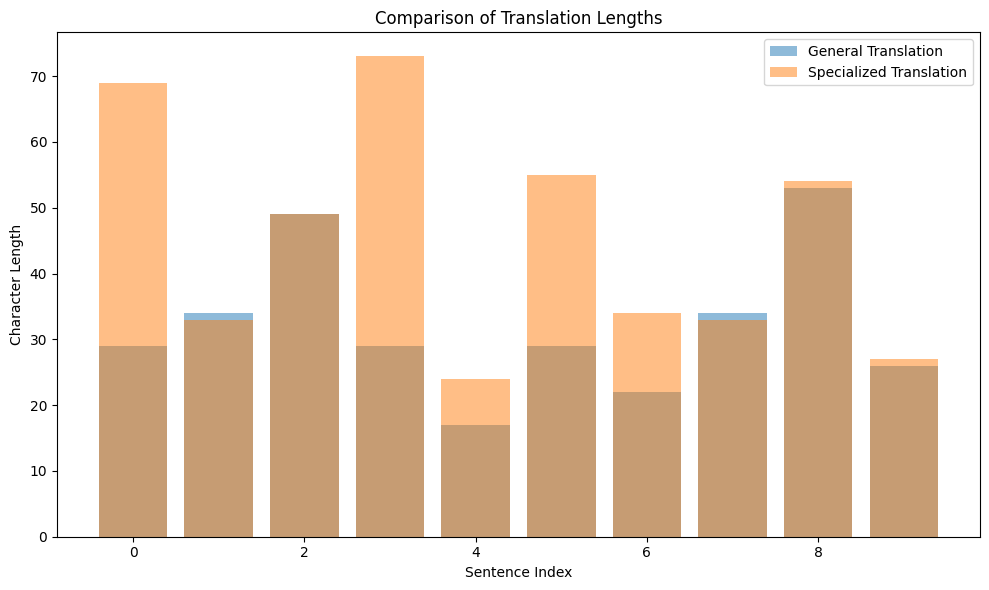

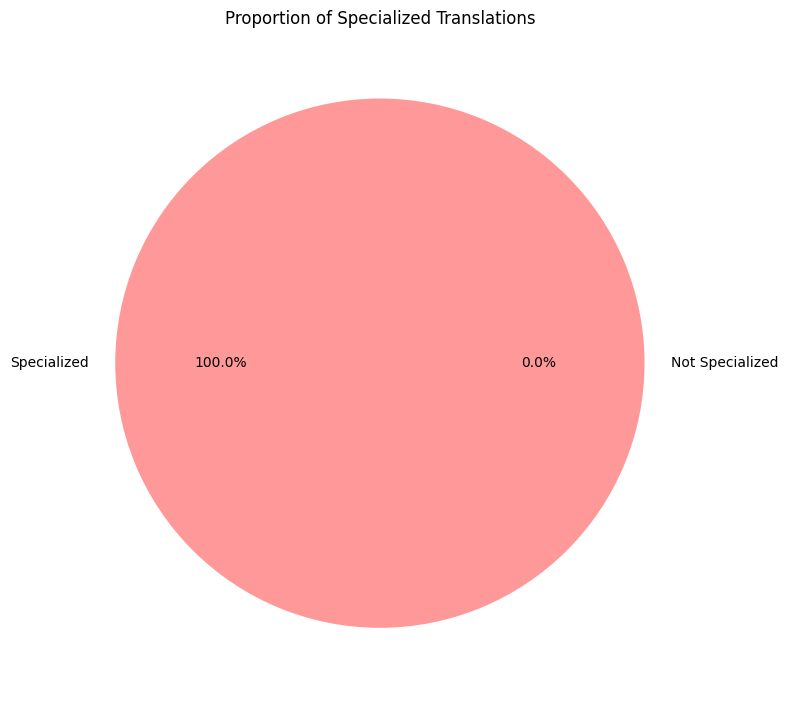

In [22]:
# Create a visualization to compare general vs. specialized translations
import matplotlib.pyplot as plt

# Create sentence length comparison
df_cooking['general_len'] = df_cooking['general_translation'].apply(len)
df_cooking['specialized_len'] = df_cooking['specialized_translation'].apply(len)

plt.figure(figsize=(10, 6))
plt.bar(range(len(df_cooking)), df_cooking['general_len'], alpha=0.5, label='General Translation')
plt.bar(range(len(df_cooking)), df_cooking['specialized_len'], alpha=0.5, label='Specialized Translation')
plt.xlabel('Sentence Index')
plt.ylabel('Character Length')
plt.title('Comparison of Translation Lengths')
plt.legend()
plt.tight_layout()
plt.show()

# Create a pie chart of specialized vs. non-specialized translations
plt.figure(figsize=(8, 8))
plt.pie([count_differences, len(df_cooking) - count_differences],
        labels=['Specialized', 'Not Specialized'],
        autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Specialized Translations')
plt.tight_layout()
plt.show()

**Create an Interactive Demo**

In [23]:
def demo_hindi_translator():
    """Interactive demo for the Hindi cooking translator."""
    print("\n=== Hindi Cooking Specialized Translator Demo ===")
    print("Enter Hindi cooking-related text (or 'quit' to exit):")

    while True:
        user_input = input("\nEnter Hindi text: ")
        if user_input.lower() == 'quit':
            break

        print("\nTranslating...")
        general = translate_text(user_input, model, tokenizer)
        specialized = specialized_translate(user_input, general, cooking_dictionary)

        print(f"\nGeneral translation: {general}")
        print(f"Specialized translation: {specialized}")

        if general == specialized:
            print("(No cooking-specific terms detected or modified)")
        else:
            print("(Translation was specialized for cooking terms)")

    print("\nThank you for using the translator!")

# Run the demo
demo_hindi_translator()


=== Hindi Cooking Specialized Translator Demo ===
Enter Hindi cooking-related text (or 'quit' to exit):

Enter Hindi text: अदरक और लहसुन को पीसकर पेस्ट बनाएं।

Translating...

General translation: And thou shalt break in pieces the ankle and the garlic, and make a boil.
Specialized translation: And paste shalt break in pieces the ankle and the garlic, and make a boil.
(Translation was specialized for cooking terms)

Enter Hindi text: बिरयानी को दम पर पकाएं

Translating...

General translation: Sculpture Apothesis
Specialized translation: Sculpture Apothesis
(No cooking-specific terms detected or modified)

Enter Hindi text: हरी चटनी के लिए धनिया और पुदीना मिलाकर पीसें।

Translating...

General translation: For the green eater, and for the putting on of gold, and for the putting on of clay.
Specialized translation: For the green eater, and for the putting on of gold, and for the putting on of clay.
(No cooking-specific terms detected or modified)

Enter Hindi text: मैं सब्जी को पहले तड